# Introduction to Artifical Neural Networks with Keras

## The Perceptron

Scikit-learn's perceptron class used on the iris dataset:

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 flowers

## Regression MLPs

Example of Scikit-learn's MLP regressor:

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

0.505332665796845

## Classification MLPs

Example of Scikit-learn's MLP classifier:

In [3]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=[8], random_state=42, max_iter=1000)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X, y)

,steps,"[('standardscaler', ...), ('mlpclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,hidden_layer_sizes,[8]
,activation,'relu'
,solver,'adam'
,alpha,0.0001


## **Implementing MLPs with Keras**

### Building an Image Classifier Using the Sequential API

load Fashion MNIST dataset

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

Look at the shape and data type of the training set:

In [5]:
X_train.shape

(55000, 28, 28)

In [6]:
X_train.dtype

dtype('uint8')

For simplicity, scaling the pixel intensities down to the 0-1 range:

In [7]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

List of class names:

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "sneaker", "Bag", "Ankle boot"]

In [9]:
# example first image in the training set represents an ankle boot:
class_names[y_train[0]]

'Ankle boot'

Examples of what is in the dataset:

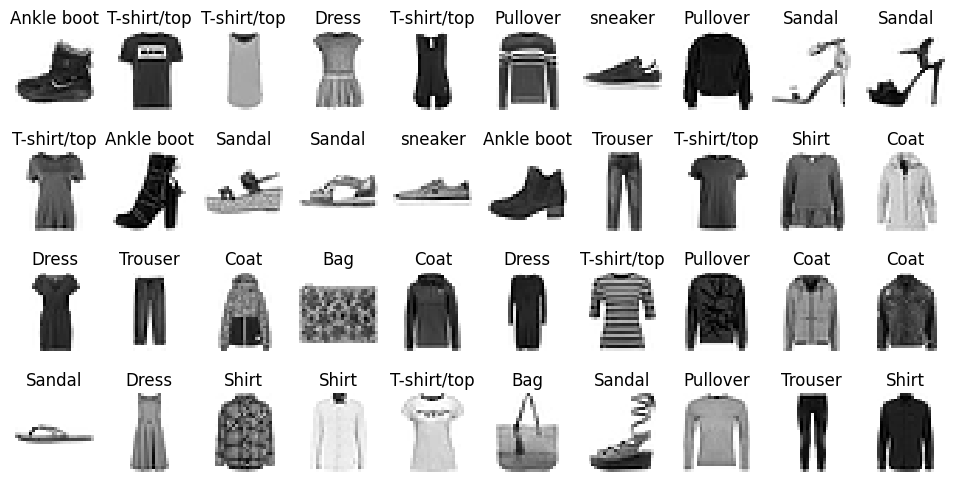

In [10]:
import matplotlib.pyplot as plt

samples = X_train[:40]
plt.figure(figsize=(12,6))
for i, img in enumerate(samples):
    plt.subplot(4,10, i + 1)
    plt.title(class_names[y_train[i]])
    plt.imshow(img, cmap="binary", interpolation="nearest")
    plt.axis("off")

plt.show()

### Creating the model using the sequential API

In [11]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Create the same model in another way:

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input([28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

See model's summary (Output shape `None` means the batch size can be anything):

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Generate image of the model:

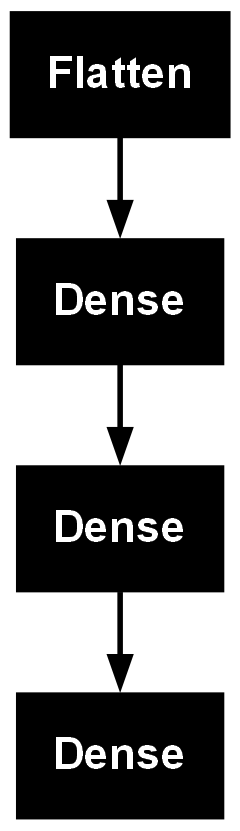

In [14]:
tf.keras.utils.plot_model(model)

We can easily get a model's list of layers using the layers attribute, or use the get_layer() method to access a layer by name:

In [15]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [16]:
hidden1 = model.layers[1]

In [17]:
hidden1.name

'dense_3'

In [18]:
model.get_layer("dense_3") is hidden1

True

All the parameters of a layer can be accessed using its get_weights() and
set_weights() methods. For a Dense layer, this includes both the
connection weights and the bias terms:

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[-0.04402869, -0.03600916, -0.01503015, ...,  0.05740489,
         0.02589428,  0.03527949],
       [-0.01074676, -0.02641466,  0.03136092, ..., -0.01200179,
        -0.04055764, -0.00660105],
       [-0.05771956, -0.00217973, -0.06072535, ..., -0.01260354,
         0.02791464, -0.0282544 ],
       ...,
       [ 0.05136919, -0.02952496, -0.0283279 , ...,  0.07245648,
         0.06799358, -0.0164378 ],
       [-0.0699294 ,  0.03333056, -0.02845388, ...,  0.00871429,
         0.02241268, -0.04905579],
       [-0.05447011,  0.0110651 ,  0.02163967, ..., -0.07403853,
        -0.03723942,  0.02403144]], shape=(784, 300), dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases.shape

(300,)

### Compiling the model

After a model is created, you must call its compile() method to specify the
loss function and the optimizer to use. Optionally, you can specify a list of
extra metrics to compute during training and evaluation:

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7566 - loss: 0.7330 - val_accuracy: 0.8314 - val_loss: 0.5083
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8289 - loss: 0.4908 - val_accuracy: 0.8396 - val_loss: 0.4566
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8445 - loss: 0.4449 - val_accuracy: 0.8466 - val_loss: 0.4324
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8533 - loss: 0.4167 - val_accuracy: 0.8530 - val_loss: 0.4150
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8603 - loss: 0.3956 - val_accuracy: 0.8550 - val_loss: 0.4031
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8660 - loss: 0.3790 - val_accuracy: 0.8578 - val_loss: 0.3953
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8704 - loss: 0.3650 - val_accuracy: 0.8622 - val_loss: 0.3852
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8749 - loss: 0.

Plot graph of the the dictionary containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set:

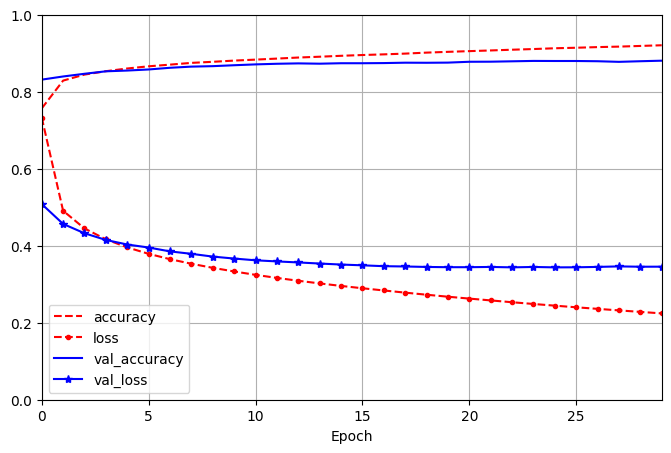

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

If we call fit again, Keras just continues training where it left off:

In [25]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9220 - loss: 0.2204 - val_accuracy: 0.8792 - val_loss: 0.3462
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9233 - loss: 0.2167 - val_accuracy: 0.8782 - val_loss: 0.3442
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9252 - loss: 0.2129 - val_accuracy: 0.8772 - val_loss: 0.3455
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9263 - loss: 0.2094 - val_accuracy: 0.8782 - val_loss: 0.3424
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9278 - loss: 0.2058 - val_accuracy: 0.8788 - val_loss: 0.3429
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9292 - loss: 0.2024 - val_accuracy: 0.8778 - val_loss: 0.3443
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9307 - loss: 0.1989 - val_accuracy: 0.8796 - val_loss: 0.3431
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9325 - loss: 0

Evaluate model:

In [26]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8792 - loss: 0.3596


[0.3595830202102661, 0.8791999816894531]

### Using the model to make predictions:

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.01, 0.  , 0.91],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

get classes with highest estimated probability:

In [28]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Actual answers:

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP using the sequential API 

Doing regression on the California dataset:

In [31]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [32]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization()
model = tf.keras.Sequential([
    tf.keras.layers.Input(X_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - RootMeanSquaredError: 0.9484 - loss: 0.8995 - val_RootMeanSquaredError: 0.7292 - val_loss: 0.5317
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6109 - loss: 0.3732 - val_RootMeanSquaredError: 0.8363 - val_loss: 0.6994
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5977 - loss: 0.3573 - val_RootMeanSquaredError: 0.7943 - val_loss: 0.6308
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5795 - loss: 0.3358 - val_RootMeanSquaredError: 0.8932 - val_loss: 0.7979
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.5770 - loss: 0.3330 - val_RootMeanSquaredError: 0.8564 - val_loss: 0.7334
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5676 - loss: 0.3222 - val_RootMeanSquaredError: 1.0349 - val_loss: 1.0711
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5610 - los

In [33]:
print(mse_test, rmse_test)

0.2843228578567505 0.5332193374633789


### Building complex models using the Functional API

Build a wide and deep neural network:

In [34]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(X_train.shape[1:]) 
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat  = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

What if we want to send a subset of the features through the wide path and a different subste (possibly overlapping) through the deep path? One solution is to use multiple inputs:

Example: send 5 features through the wide path(features 0 to 4), and six features through the deep path (features 2 to 7)

In [35]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

Compile, split features, adapt, fit, evaluate, predict:

In [36]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=
              ["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
print(mse_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - RootMeanSquaredError: 1.3348 - loss: 1.7818 - val_RootMeanSquaredError: 1.2681 - val_loss: 1.6080
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.7756 - loss: 0.6016 - val_RootMeanSquaredError: 0.7481 - val_loss: 0.5597
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6971 - loss: 0.4860 - val_RootMeanSquaredError: 0.7087 - val_loss: 0.5022
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6567 - loss: 0.4313 - val_RootMeanSquaredError: 0.6423 - val_loss: 0.4126
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6311 - loss: 0.3982 - val_RootMeanSquaredError: 0.6108 - val_loss: 0.3731
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6146 - loss: 0.3778 - val_RootMeanSquaredError: 0.6623 - val_loss: 0.4386
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6044 - los

Add an auxiliary output to the model as a regularization technique:

In [37]:
input_wide = tf.keras.layers.Input([5], name="wide_input")
input_deep = tf.keras.layers.Input([6], name="deep_input")
norm_wide_layer = tf.keras.layers.Normalization()
norm_deep_layer = tf.keras.layers.Normalization()
norm_wide = norm_wide_layer(input_wide)
norm_deep = norm_deep_layer(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1, name="output")(concat)
aux_output = tf.keras.layers.Dense(1, name="aux_output")(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [38]:
model.compile(loss={"output":"mse", "aux_output": "mse"}, loss_weights=(0.9, 0.1),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
norm_wide_layer.adapt(X_train_wide)
norm_deep_layer.adapt(X_train_deep)
history = model.fit(
    {"wide_input": X_train_wide, "deep_input": X_train_deep},
    {"output": y_train, "aux_output": y_train}, epochs=20,
    validation_data=({"wide_input": X_valid_wide, "deep_input": X_valid_deep},
    {"output": y_valid, "aux_output": y_valid}))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - aux_output_RootMeanSquaredError: 1.4842 - aux_output_loss: 2.2023 - loss: 2.2403 - output_RootMeanSquaredError: 1.4981 - output_loss: 2.2436 - val_aux_output_RootMeanSquaredError: 1.6767 - val_aux_output_loss: 2.8101 - val_loss: 1.0307 - val_output_RootMeanSquaredError: 0.9126 - val_output_loss: 0.8326
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_RootMeanSquaredError: 0.8399 - aux_output_loss: 0.7055 - loss: 0.6414 - output_RootMeanSquaredError: 0.7964 - output_loss: 0.6343 - val_aux_output_RootMeanSquaredError: 0.8591 - val_aux_output_loss: 0.7378 - val_loss: 0.5573 - val_output_RootMeanSquaredError: 0.7330 - val_output_loss: 0.5371
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - aux_output_RootMeanSquaredError: 0.7517 - aux_output_loss: 0.5650 - loss: 0.5075 - output_RootMeanSquaredError: 0.7079 - output_loss: 0.5011 - val_aux_output_RootMeanSquaredError: 0.7370 - val_aux_output_loss: 0.5431 - val_loss: 0

When we evaluate the model, Keras returns the weighted sum of the losses, as well as the individual losses and metrics:

In [39]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
print(eval_results)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_RootMeanSquaredError: 0.6340 - aux_output_loss: 0.4023 - loss: 0.3384 - output_RootMeanSquaredError: 0.5757 - output_loss: 0.3310
[0.3384334444999695, 0.3310449719429016, 0.4023212790489197, 0.6339617371559143, 0.5756567716598511]


Other way:

In [40]:
model.evaluate((X_test_wide, X_test_deep), (y_test, y_test), return_dict=True)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - aux_output_RootMeanSquaredError: 0.6340 - aux_output_loss: 0.4023 - loss: 0.3384 - output_RootMeanSquaredError: 0.5757 - output_loss: 0.3310


{'aux_output_RootMeanSquaredError': 0.6339617371559143,
 'aux_output_loss': 0.4023212790489197,
 'loss': 0.3384334444999695,
 'output_RootMeanSquaredError': 0.5756567716598511,
 'output_loss': 0.3310449719429016}

Similarly, the predict() method will return predictions for each output:

In [41]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
print(y_pred_main, "\n", y_pred_aux)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[[0.3359003]
 [1.3258281]
 [3.5196927]] 
 [[0.50408417]
 [1.1604298 ]
 [3.3746562 ]]


Predict() method does not have return_dict argument to get a dictionary instead. However, you can create one using model.output_names:

In [42]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


{'output': array([[0.3359003],
        [1.3258281],
        [3.5196927]], dtype=float32),
 'aux_output': array([[0.50408417],
        [1.1604298 ],
        [3.3746562 ]], dtype=float32)}

### Using the Subclassing API to build dynamic models

Creating an instance of the following
WideAndDeepModel class gives us an equivalent model to the one we just
built with the functional API:

In [43]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

### Saving and restoring a model

Building and fitting the model first:

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"],
              optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train),
          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), 
          epochs=10)
y_pred, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - RootMeanSquaredError: 1.5183 - RootMeanSquaredError_1: 1.3011 - loss: 3.9980 - mse_loss: 1.6924 - val_RootMeanSquaredError: 1.0602 - val_RootMeanSquaredError_1: 0.8802 - val_loss: 1.8988 - val_mse_loss: 0.7746
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.7997 - RootMeanSquaredError_1: 0.7907 - loss: 1.2648 - mse_loss: 0.6252 - val_RootMeanSquaredError: 0.7229 - val_RootMeanSquaredError_1: 1.1811 - val_loss: 1.9175 - val_mse_loss: 1.3944
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.7173 - RootMeanSquaredError_1: 0.7511 - loss: 1.0786 - mse_loss: 0.5642 - val_RootMeanSquaredError: 0.6907 - val_RootMeanSquaredError_1: 1.2220 - val_loss: 1.9703 - val_mse_loss: 1.4927
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6733 - RootMeanSquaredError_1: 0.7331 - loss: 0.9907 - mse_loss: 0.5374 - val_RootMeanSquaredError: 0.7186 - val_RootMeanSquaredEr

Saving a trained Keras model is as simple as it gets: 

In [45]:
model.save("my_keras_model.keras")

You will typically have a script that trains a model and saves it, and one or
more scripts (or web services) that load the model and use it to evaluate it
or to make predictions. Loading the model is just as easy as saving it:

`Warning`: If the model uses any custom object, you must pass them to the function via the custom_objects argument:

In [46]:
loaded_model = tf.keras.models.load_model(
    "my_keras_model.keras",
    custom_objects={"WideAndDeepModel": WideAndDeepModel})

Export model to the SavedModel format using model.export:

In [47]:
model.export("my_keras_model")

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


Saved artifact at 'my_keras_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): Tuple[TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)]
Output Type:
  Tuple[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  1864714044624: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  1864714059216: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  1864714047120: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  1864714049616: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  1865485840656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1865485842192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1865485843920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1865485835664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1865485842576: TensorSpec(shape=(), dtype=tf.resou

Load the model in the saved model format:

`Warning`: In Keras 3, it is no longer possible to load a TensorFlow SavedModel as a Keras model. However, you can load a SavedModel as a tf.keras.layers.TFSMLayer layer, but be aware that this layer can only be used for inference: no training.

In [48]:
tfsm_layer = tf.keras.layers.TFSMLayer("my_keras_model")
y_pred_main, y_pred_aux = tfsm_layer((X_new_wide, X_new_deep))

`Warning`: Keras now requires the saved weights to have the .weights.h5 extension. They are no longer saved using the SavedModel format.

In [49]:
model.save_weights("my_weights.weights.h5")

In [50]:
model.load_weights("my_weights.weights.h5")

### Using Callbacks

The fit() method accepts a callbacks argument that lets you specify a
list of objects that Keras will call before and after training, before and after
each epoch, and even before and after processing each batch. For example,
the ModelCheckpoint callback saves checkpoints of your model at regular
intervals during training, by default at the end of each epoch:

In [51]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5864 - RootMeanSquaredError_1: 0.6466 - loss: 0.7620 - mse_loss: 0.4181 - val_RootMeanSquaredError: 1.1781 - val_RootMeanSquaredError_1: 1.8200 - val_loss: 4.7003 - val_mse_loss: 3.3107
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5875 - RootMeanSquaredError_1: 0.6441 - loss: 0.7601 - mse_loss: 0.4150 - val_RootMeanSquaredError: 1.4039 - val_RootMeanSquaredError_1: 1.4487 - val_loss: 4.0698 - val_mse_loss: 2.0979
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5875 - RootMeanSquaredError_1: 0.6324 - loss: 0.7452 - mse_loss: 0.4000 - val_RootMeanSquaredError: 1.6081 - val_RootMeanSquaredError_1: 1.3316 - val_loss: 4.3591 - val_mse_loss: 1.7723
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5905 - RootMeanSquaredError_1: 0.6302 - loss: 0.7458 - mse_loss: 0.3972 - val_RootMeanSquaredError: 1.9555 - val_RootMeanSquaredEr

Moreover, if you use a validation set during training, you can set save_
best_only=True when creating the ModelCheckpoint. In this case, it will
only save your model when its performance on the validation set is the best
so far. This way, you do not need to worry about training for too long and
overfitting the training set: simply restore the last saved model after
training, and this will be the best model on the validation set. This is one
way to implement early stopping, but it won’t
actually stop training.

Another way is to use the EarlyStopping callback. It will interrupt training
when it measures no progress on the validation set for a number of epochs
(defined by the patience argument), and if you set
restore_best_weights=True it will roll back to the best model at the end
of training. You can combine both callbacks to save checkpoints of your
model in case your computer crashes, and interrupt training early when
there is no more progress, to avoid wasting time and resources and to
reduce overfitting:

In [52]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
                                    patience=10,
                                    restore_best_weights=True)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train),
                    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
                    epochs=30,
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5731 - RootMeanSquaredError_1: 0.6106 - loss: 0.7012 - mse_loss: 0.3729 - val_RootMeanSquaredError: 1.1438 - val_RootMeanSquaredError_1: 0.6927 - val_loss: 1.7882 - val_mse_loss: 0.4798
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5732 - RootMeanSquaredError_1: 0.6110 - loss: 0.7019 - mse_loss: 0.3733 - val_RootMeanSquaredError: 1.2756 - val_RootMeanSquaredError_1: 0.9922 - val_loss: 2.6116 - val_mse_loss: 0.9842
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.5728 - RootMeanSquaredError_1: 0.6100 - loss: 0.7001 - mse_loss: 0.3722 - val_RootMeanSquaredError: 1.2393 - val_RootMeanSquaredError_1: 1.2319 - val_loss: 3.0536 - val_mse_loss: 1.5171
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5727 - RootMeanSquaredError_1: 0.6175 - loss: 0.7093 - mse_loss: 0.3814 - val_RootMeanSquaredError: 0.9744 - val_RootMeanSquaredEr

If you need extra control, you can easily write your own custom callbacks.
For example, the following custom callback will display the ratio between
the validation loss and the training loss during training (e.g., to detect
overfitting):

In [53]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

As you might expect, you can implement on_train_begin(),
on_train_end(), on_epoch_begin(), on_epoch_end(),
on_batch_begin(), and on_batch_end(). Callbacks can also be used
during evaluation and predictions, should you ever need them (e.g., for
debugging). For evaluation, you should implement on_test_begin(),
on_test_end(), on_test_batch_begin(), or on_test_batch_end(),
which are called by evaluate(). For prediction, you should implement
on_predict_begin(), on_predict_end(), on_predict_batch_begin(),
or on_predict_batch_end(), which are called by predict().

### Using TensorBoard for visualization

Let’s name the root log directory my_logs, and let’s define a little function
that generates the path of the log subdirectory based on the current date and
time, so that it’s different at every run:

In [54]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
print(run_logdir)

my_logs\run_2025_08_20_13_42_27


It is straightforward to use:

In [55]:
tf.random.set_seed(42)
model = WideAndDeepModel(30, activation="relu")
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
model.compile(loss=["mse", "mse"],
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
tensorboard_cb2 = tf.keras.callbacks.TensorBoard(get_run_logdir(),
                                                profile_batch=(100,200))
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train),
          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
          epochs=30, callbacks=[tensorboard_cb2])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - RootMeanSquaredError: 1.2384 - RootMeanSquaredError_1: 1.3790 - loss: 3.4351 - mse_loss: 1.9010 - val_RootMeanSquaredError: 0.7576 - val_RootMeanSquaredError_1: 1.1216 - val_loss: 1.8321 - val_mse_loss: 1.2577
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6946 - RootMeanSquaredError_1: 0.8106 - loss: 1.1396 - mse_loss: 0.6570 - val_RootMeanSquaredError: 0.6789 - val_RootMeanSquaredError_1: 0.7688 - val_loss: 1.0520 - val_mse_loss: 0.5910
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6584 - RootMeanSquaredError_1: 0.7520 - loss: 0.9990 - mse_loss: 0.5654 - val_RootMeanSquaredError: 0.8072 - val_RootMeanSquaredError_1: 0.7354 - val_loss: 1.1924 - val_mse_loss: 0.5407
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6383 - RootMeanSquaredError_1: 0.7252 - loss: 0.9333 - mse_loss: 0.5259 - val_RootMeanSquaredError: 0.6726 - val_RootMeanSquaredEr

Doing another run but with learning rate = 0.002:

In [56]:
model = WideAndDeepModel(30, activation="relu")
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
model.compile(loss=["mse", "mse"],
              optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
tensorboard_cb2 = tf.keras.callbacks.TensorBoard(get_run_logdir(),
                                                profile_batch=(100,200))
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train),
          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
          epochs=30, callbacks=[tensorboard_cb2])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - RootMeanSquaredError: 1.1301 - RootMeanSquaredError_1: 1.0080 - loss: 2.2933 - mse_loss: 1.0159 - val_RootMeanSquaredError: 0.8668 - val_RootMeanSquaredError_1: 1.0162 - val_loss: 1.7840 - val_mse_loss: 1.0323
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.7301 - RootMeanSquaredError_1: 0.7635 - loss: 1.1160 - mse_loss: 0.5829 - val_RootMeanSquaredError: 0.6603 - val_RootMeanSquaredError_1: 1.2110 - val_loss: 1.9025 - val_mse_loss: 1.4659
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6614 - RootMeanSquaredError_1: 0.7117 - loss: 0.9439 - mse_loss: 0.5065 - val_RootMeanSquaredError: 0.8617 - val_RootMeanSquaredError_1: 0.9303 - val_loss: 1.6079 - val_mse_loss: 0.8651
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6279 - RootMeanSquaredError_1: 0.6833 - loss: 0.8612 - mse_loss: 0.4669 - val_RootMeanSquaredError: 0.9963 - val_RootMeanSquaredEr

to run in jupyter:
1. %load_ext tensorboard
2. %tensorboard --logdir=./my_logs

To start TensorBoard from a terminal:
1. tensorboard --logdir=./my_logs

Additionally, TensorFlow offers a lower-level API in the tf.summary
package. The following code creates a SummaryWriter using the
create_file_writer() function, and it uses this writer as a Python
context to log scalars, histograms, images, audio, and text, all of which can
then be visualized using TensorBoard:

In [57]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)

        data = (np.random.default_rng(seed=42).standard_normal(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.default_rng(seed=42).random((2, 32, 32, 3)) * step / 1000
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Fine-Tuning Neural Network Hyperparameters

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

Classify Fashion MNIST images

In [60]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [59]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

Now if you want to do a basic random search, you can create a
kt.RandomSearch tuner, passing the build_model function to the
constructor, and call the tuner’s search() method:

In [62]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 01m 21s]
val_accuracy: 0.8366000056266785

Best val_accuracy So Far: 0.8532000184059143
Total elapsed time: 00h 06m 48s


You can get the best models like this:

In [63]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

Call get_best_hyperparameters() to get the kt.HyperParameters of the best models:

In [64]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values # best hyperparameters values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

Each tuner is guided by a so-called oracle: before each trial, the tuner asks
the oracle to tell it what the next trial should be. The RandomSearch tuner
uses a RandomSearchOracle, which is pretty basic: it just picks the next
trial randomly, as we saw earlier. Since the oracle keeps track of all the
trials, you can ask it to give you the best one, and you can display a
summary of that trial:

In [66]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8532000184059143


If you are happy with the best model’s performance, you may continue
training it for a few epochs on the full training set (X_train_full and
y_train_full), then evaluate it on the test set

In [67]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8755 - loss: 0.3334
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8807 - loss: 0.3200
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8856 - loss: 0.3096
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8886 - loss: 0.3006
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8916 - loss: 0.2923
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8946 - loss: 0.2853
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8969 - loss: 0.2778
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8990 - loss: 0.2713
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9005 - loss: 0.2656
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9021 - loss: 0.2601
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8531 - loss: 0.4235


In [68]:
print(test_loss, test_accuracy)

0.4235197901725769 0.8531000018119812


In some cases, you may want to fine-tune data preprocessing
hyperparameters, or model.fit() arguments, such as the batch size. For
this, you must use a slightly different technique: instead of writing a
build_model() function, you must subclass the kt.HyperModel class and
define two methods, build() and fit(). The build() method does the
exact same thing as the build_model() function. The fit() method takes
a HyperParameters object and a compiled model as an argument, as well
as all the model.fit() arguments, and fits the model and returns the
History object. Crucially, the fit() method may use hyperparameters to
decide how to preprocess the data, tweak the batch size, and more. For
example, the following class builds the same model as before, with the
same hyperparameters, but it also uses a Boolean "normalize"
hyperparameter to control whether or not to standardize the training data
before fitting the model:

In [69]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs) 

In some cases, you may want to fine-tune data preprocessing
hyperparameters, or model.fit() arguments, such as the batch size. For
this, you must use a slightly different technique: instead of writing a
build_model() function, you must subclass the kt.HyperModel class and
define two methods, build() and fit(). The build() method does the
exact same thing as the build_model() function. The fit() method takes
a HyperParameters object and a compiled model as an argument, as well
as all the model.fit() arguments, and fits the model and returns the
History object. Crucially, the fit() method may use hyperparameters to
decide how to preprocess the data, tweak the batch size, and more. For
example, the following class builds the same model as before, with the
same hyperparameters, but it also uses a Boolean "normalize"
hyperparameter to control whether or not to standardize the training data
before fitting the model. Also, using the TensorBoard callback,
this time pointing to the root log directory (the tuner will take care of using
a different subdirectory for each trial), as well as an EarlyStopping
callback:

In [70]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [71]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 01m 34s]
val_accuracy: 0.8345999717712402

Best val_accuracy So Far: 0.875
Total elapsed time: 00h 42m 24s


Doing Bayesian Optimization search:

In [76]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")

bayesian_opt_tuner.search(X_train, y_train, epochs=5,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 42s]
val_accuracy: 0.8238000273704529

Best val_accuracy So Far: 0.8424000144004822
Total elapsed time: 00h 06m 42s
